In [1]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#change to the directory where the files are stored

In [61]:
os.chdir("/Users/yimingtang/Downloads/ST2195 Assignment/Coursework")

In [62]:
try:
    os.remove('airline.db')
except OSError:
    pass

In [63]:
#create database

In [64]:
conn = sqlite3.connect('airline.db')

In [25]:
#reading csv and writing into database

In [26]:
airports = pd.read_csv("airports.csv")
carriers = pd.read_csv("carriers.csv")
planes = pd.read_csv("plane-data.csv")

In [65]:
airports.to_sql('airports',con=conn, index=False)
carriers.to_sql('carriers',con=conn, index=False)
planes.to_sql('planes',con=conn, index=False)

5029

In [66]:
c = conn.cursor()

In [67]:
c.execute(''' 
CREATE TABLE ontime (
    Year int,
    Month int,
    DayofMonth int,
    DayofWeek int,
    DepTime int,
    CRSDepTime int,
    ArrTime int,
    CRSArrTime int,
    UniqueCarrier varchar(5),
    FlightNum int,
    TailNum varchar(8),
    ActualElapsedTime int,
    CRSElapsedTime int,
    AirTime int,
    ArrDelay int,
    DepDelay int,
    Origin varchar(3),
    Dest varchar(3),
    Distance int,
    TaxiIn int,
    TaxiOut int,
    Cancelled int,
    CancellationCode varchar(1),
    Diverted varchar(1),
    CarrierDelay int,
    WeatherDelay int,
    NASDelay int,
    SecurityDelay int,
    LateAircraftDelay int,
    TotalDelay int,
    Delay varchar(1)
    )
''')

conn.commit()

In [30]:
ontime = pd.concat(map(pd.read_csv,['2005.csv','2006.csv']))

In [31]:
ontime=ontime.dropna(axis=0, thresh = 26)

In [32]:
ontime["TotalDelay"]=ontime["ArrDelay"] + ontime["DepDelay"]

In [33]:
ontime["Delay"]=np.where(ontime["TotalDelay"]>15, 1,0)

In [34]:
ontime=ontime.dropna(axis=0, thresh = 26)
ontime["TotalDelay"]=ontime["ArrDelay"] + ontime["DepDelay"]
ontime["Delay"]=np.where(ontime["TotalDelay"]>15, 1,0)


In [68]:
ontime.to_sql('ontime',if_exists = 'append', con=conn,index=False)
conn.commit()

In [69]:
#=====Answer to Question 1=====

In [70]:
q1a=c.execute('''
SELECT ontime.Deptime, AVG(ontime.TotalDelay) as AvgDelay
FROM ontime
WHERE ontime.Cancelled = 0 AND ontime.Diverted = 0
GROUP by ontime.Deptime
ORDER by AvgDelay
''').fetchall()

In [71]:
q1a=pd.DataFrame(q1a,columns=['Deptime','AvgDelay'])

In [72]:
print(q1a['Deptime'].iloc[0], "is the best time of day to fly to minimise delays, having ",q1a['AvgDelay'].iloc[0],"average delay in minutes")

354 is the best time of day to fly to minimise delays, having  -30.90909090909091 average delay in minutes


In [136]:
q1b=c.execute('''
SELECT ontime.DayofWeek, AVG(ontime.TotalDelay) as AvgDelay
FROM ontime
WHERE ontime.Cancelled = 0 AND ontime.Diverted = 0
GROUP by ontime.DayofWeek
ORDER by AvgDelay
''').fetchall()

In [138]:
q1b=pd.DataFrame(q1b,columns=['DayofWeek','AvgDelay'])

In [139]:
print(q1b['DayofWeek'].iloc[0], "is the best day of the week to fly to minimise delays, having ",q1b['AvgDelay'].iloc[0],"average delay in minutes")

6 is the best day of the week to fly to minimise delays, having  11.614537610099495 average delay in minutes


In [132]:
q1c=c.execute('''
SELECT ontime.Month, AVG(ontime.TotalDelay) as AvgDelay
FROM ontime
WHERE ontime.Cancelled = 0 AND ontime.Diverted = 0
GROUP by ontime.Month
ORDER by AvgDelay
''').fetchall()

In [133]:
q1c=pd.DataFrame(q1c,columns=['Month','AvgDelay'])

In [134]:
print(q1c['Month'].iloc[0], "is the best time of year to fly to minimise delays, having ",q1c['AvgDelay'].iloc[0],"average delay in minutes")


4 is the best time of year to fly to minimise delays, having  10.992882531701689 average delay in minutes


In [ ]:
#=====Answer to Question 2=====

In [81]:
q2=c.execute('''
SELECT planes.year As PlaneYear,ontime.Year As FlightYear, ontime.TotalDelay As TotalDelay, ontime.Delay As Delay
  FROM planes JOIN ontime USING(tailnum)
  WHERE ontime.Cancelled=0 AND planes.year !='' AND planes.year != '0000' AND planes.year !='None'
  ORDER by FlightYear DESC       
''').fetchall()

In [82]:
q2=pd.DataFrame(q2,columns=['PlaneYear','FlightYear','TotalDelay','Delay'])

In [83]:
#Checking datatype of q2

In [84]:
dataTypeSeries = q2.dtypes
print(dataTypeSeries)

PlaneYear     object
FlightYear     int64
TotalDelay     int64
Delay         object
dtype: object


In [85]:
q2['PlaneYear']=q2['PlaneYear'].astype(int)
q2["YearDiff"] = q2["FlightYear"] - q2["PlaneYear"]
q2["Delay"]=np.where(q2["TotalDelay"] >15, "Yes","No" )

In [86]:
#plotting of q2

<AxesSubplot:xlabel='Year Difference', ylabel='No. of Delay'>

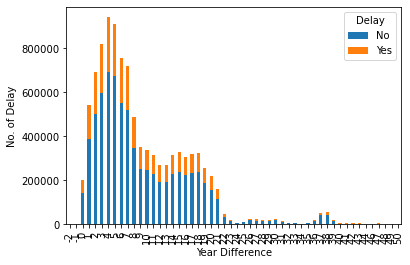

In [87]:
q2plot = q2.groupby(['YearDiff','Delay']).size().unstack()
q2plot.plot(kind='bar', stacked = True, ylabel = "No. of Delay", xlabel = "Year Difference")

<AxesSubplot:xlabel='YearDiff'>

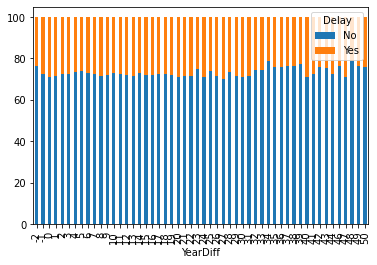

In [88]:
q2bplot=q2plot.apply(lambda x: x*100/sum(x), axis=1)
q2bplot.plot(kind="bar", stacked=True)

In [89]:
#======Answer to Question 3=====

In [90]:
q3=c.execute('''
SELECT airports.state AS State, COUNT(*) AS Count, ontime.Month, ontime.Year
FROM airports JOIN ontime ON ontime.origin = airports.iata
WHERE ontime.Cancelled = 0 AND ontime.Diverted = 0 AND State !=''
GROUP by State,ontime.Year,ontime.Month
ORDER by State
''').fetchall()

In [91]:
q3=pd.DataFrame(q3,columns=['State','Count','Month','Year'])

In [92]:
#plotting of q3

In [93]:
def do_annotate(x_col, y_col, data, color, **kwargs):
    x = data[x_col]
    y = data[y_col]
    for i in range(len(x)):
        plt.annotate(str(y.values[i]), xy=(x.values[i]-1, y.values[i]), fontsize=6,
                     xytext=(0, 10), textcoords="offset points",
                     color=kwargs.get("text_color", "k"),
                     va='center', ha='center', weight='bold')

In [94]:
#As DC doesn't have flight in 2005     

In [95]:
q3 = q3[~((q3['State'] == 'DC') & (q3['Year'] == 2005))]

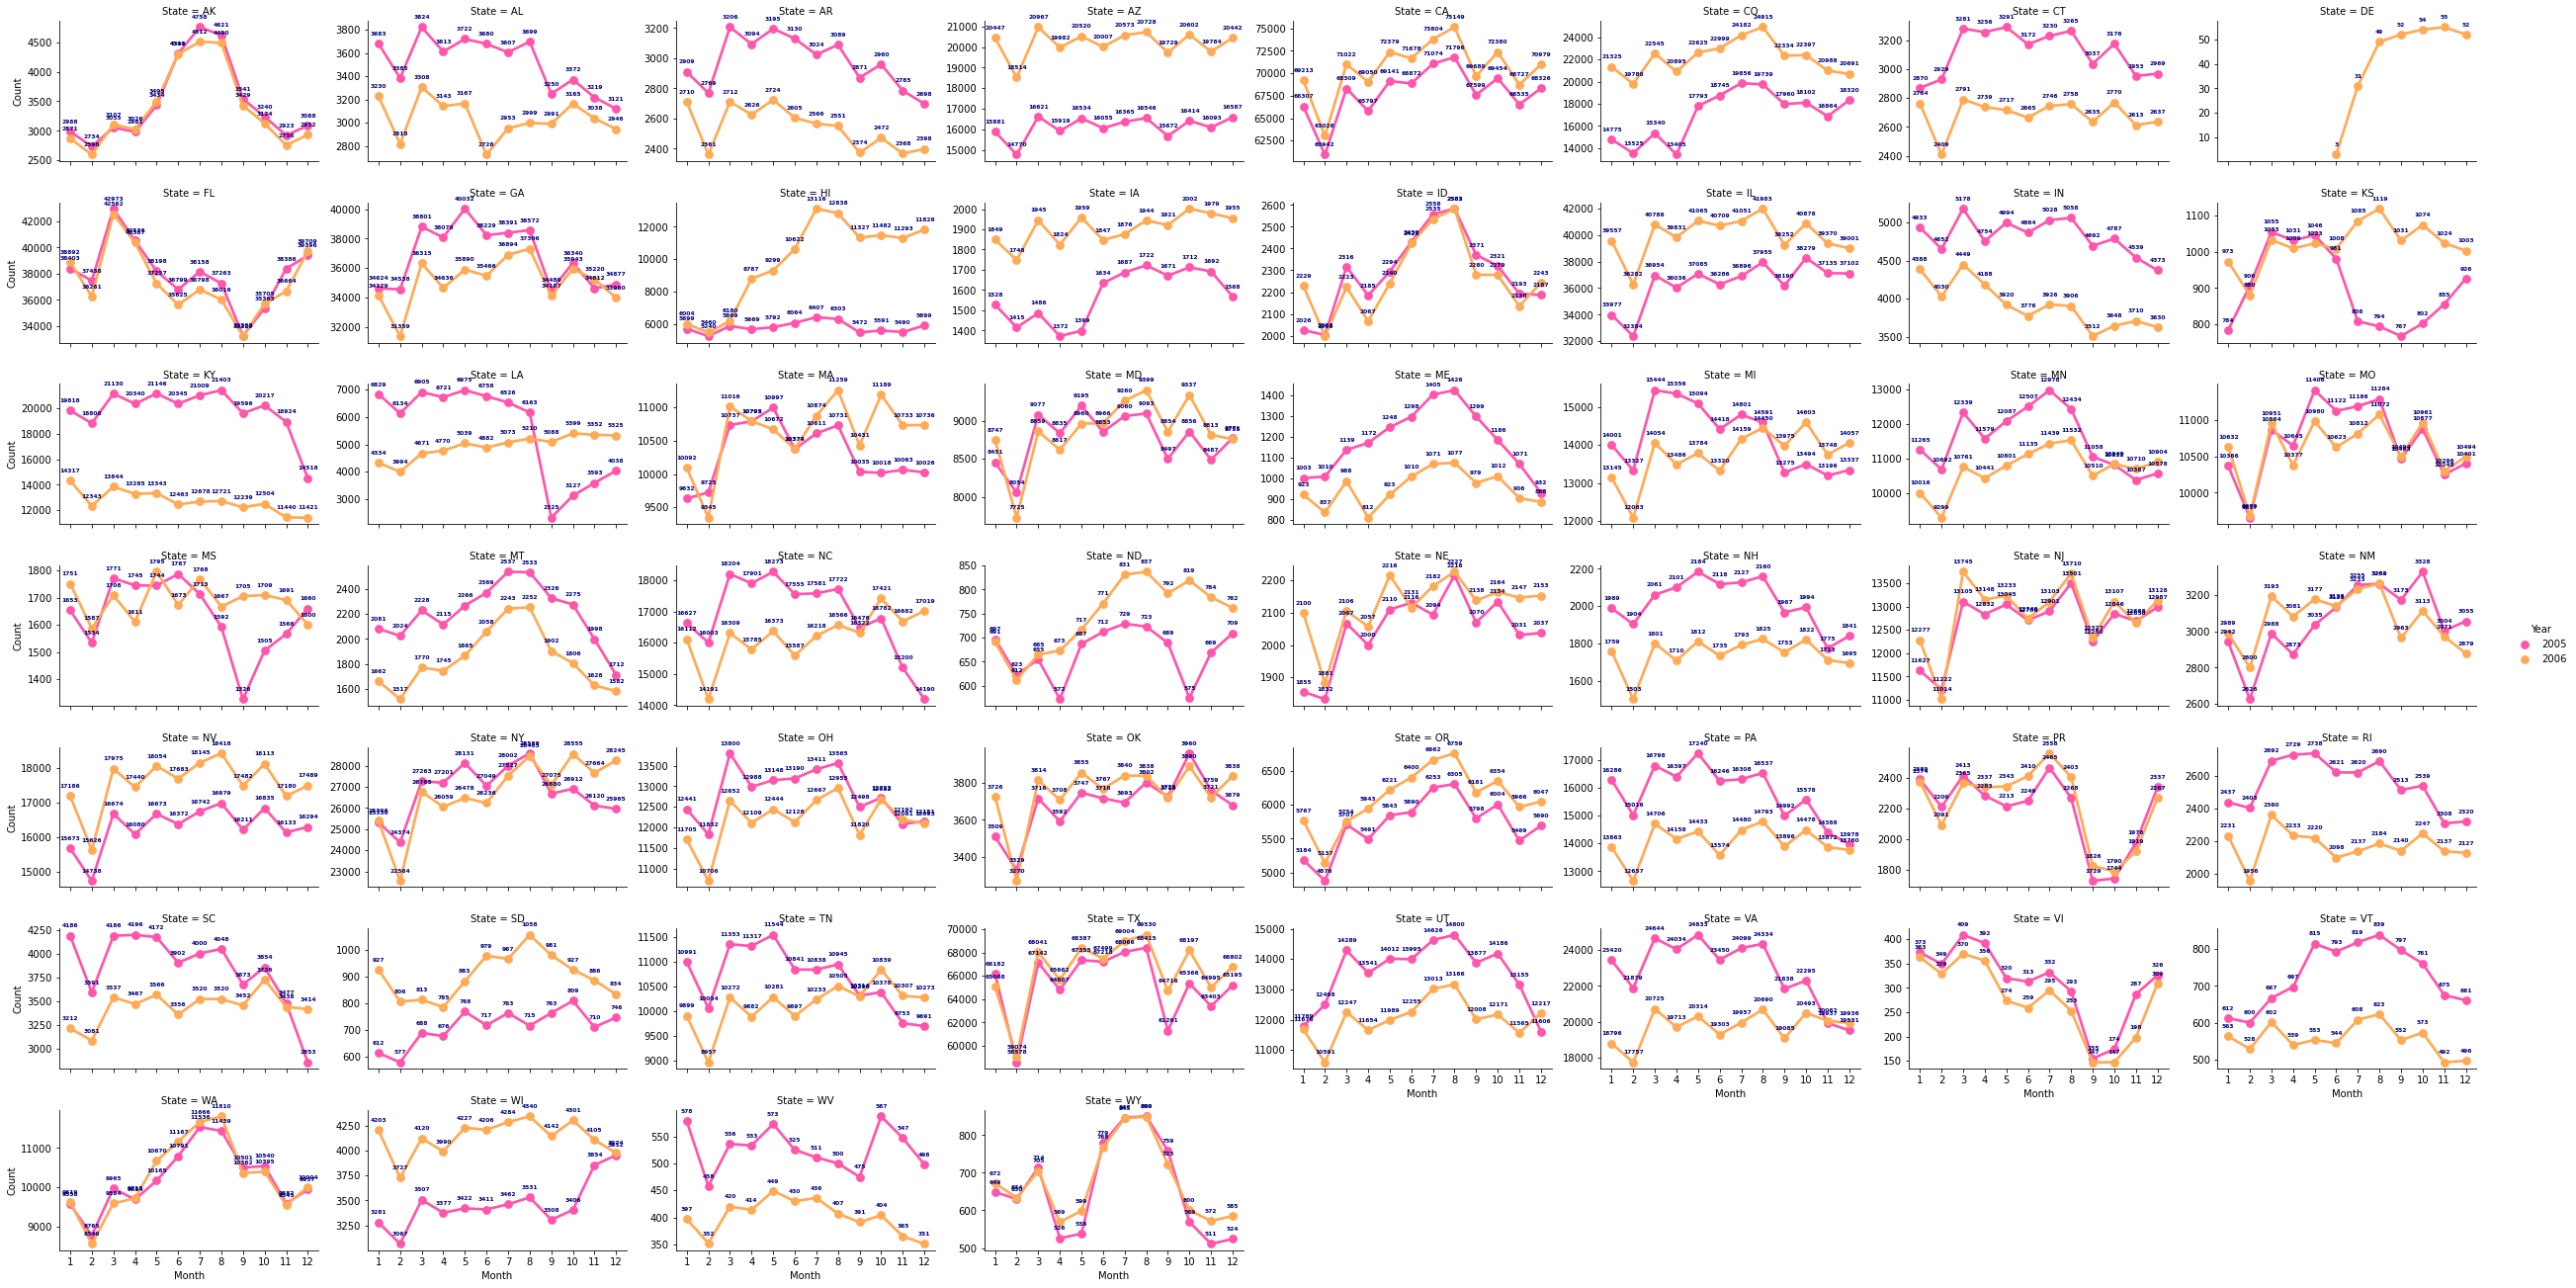

In [96]:
g3 = sns.catplot(kind='point', data=q3, x="Month", y="Count", hue="Year", palette='spring',
                col="State", col_wrap=8, height=2.6, aspect=1.7, sharey=False, sharex=True, legend_out=True)
g3.map_dataframe(do_annotate, 'Month', 'Count', text_color='navy')

In [97]:
#=====Answer to Question 4=====

In [98]:
#sample of tailnum derived from R for answering

In [99]:
q4sampletailnum={'TailNum':["N351UA","N960DL","N524", "N14998", "N355CA", "N587AA", "N839UA","N516UA"]}
q4sampletailnum=pd.DataFrame(q4sampletailnum)

In [100]:
q4a=c.execute('''
SELECT airports.airport AS AirportOrigin,ontime.Year, ontime.Month,ontime.DayofMonth, ontime.DepTime,ontime.ArrTime,ontime.DepDelay,ontime.ArrDelay,ontime.TotalDelay,ontime.TailNum, ontime.Origin, ontime.Dest, airports.long AS OriginLong, airports.lat AS OriginLat
FROM airports JOIN ontime ON ontime.origin = airports.iata
WHERE ontime.Year=2005 AND ontime.Month=1 AND ontime.DayofMonth BETWEEN 1 AND 7 AND ontime.Cancelled = 0 AND ontime.Diverted = 0 AND ontime.TailNum IN ('N351UA','N960DL','N524', 'N14998', 'N355CA', 'N587AA', 'N839UA','N516UA')
ORDER by ontime.TailNum, ontime.Year,ontime.Month,ontime.DayofMonth, ontime.DepTime,ontime.ArrTime
''').fetchall()

In [101]:
q4a=pd.DataFrame(q4a,columns=['AirportOrigin','Year','Month','DayofMonth','Deptime','ArrTime','DepDelay','ArrDelay','TotalDelay','TailNum','Origin','Dest','OriginLong','OriginLat'])

In [102]:
q4b=c.execute('''
SELECT airports.airport AS AirportDest,ontime.Year, ontime.Month,ontime.DayofMonth, ontime.DepTime,ontime.ArrTime,ontime.DepDelay,ontime.ArrDelay,ontime.TotalDelay,ontime.TailNum, ontime.Origin, ontime.Dest, airports.long AS DestLong, airports.lat AS DestLat
FROM airports JOIN ontime ON ontime.dest = airports.iata
WHERE ontime.Year=2005 AND ontime.Month=1 AND ontime.DayofMonth BETWEEN 1 AND 7 AND ontime.Cancelled = 0 AND ontime.Diverted = 0 AND ontime.TailNum IN ('N351UA','N960DL','N524', 'N14998', 'N355CA', 'N587AA', 'N839UA','N516UA')
ORDER by ontime.TailNum, ontime.Year,ontime.Month,ontime.DayofMonth, ontime.DepTime,ontime.ArrTime
''').fetchall()

In [103]:
q4b=pd.DataFrame(q4b,columns=['AirportDest','Year','Month','DayofMonth','Deptime','ArrTime','DepDelay','ArrDelay','TotalDelay','TailNum','Origin','Dest','DestLong','DestLat'])

In [104]:
q4c=pd.merge(q4a, q4b, how="inner" ,on=['Year','Month','DayofMonth','Deptime','ArrTime','DepDelay','ArrDelay','TotalDelay','TailNum','Origin','Dest'])


In [105]:
import geopandas as gpd

In [106]:
states = gpd.read_file("/Users/yimingtang/Downloads/ST2195 Assignment/Coursework/tl_2021_us_state/tl_2021_us_state.shp")
states= states.to_crs("EPSG:4326")

In [107]:
non_continental = ['HI','VI','MP','GU','AK','AS','PR']

for n in non_continental:
    states = states[states.STUSPS != n]

In [108]:
#q4a(1)

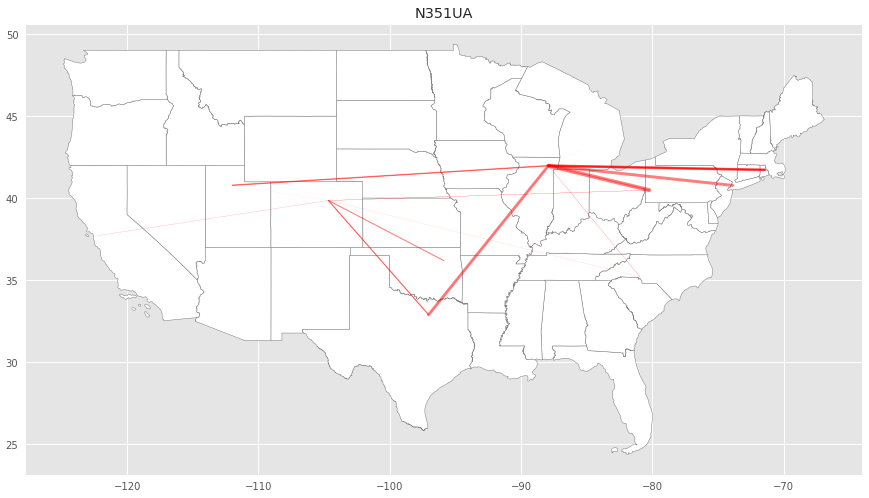

In [109]:
q4c1 = q4c[(q4c.TailNum=='N351UA')]

#zip disappear after creating a object
source_to_dest1 = zip(q4c1["OriginLat"], q4c1["DestLat"],
                     q4c1["OriginLong"], q4c1["DestLong"],
                     q4c1["TotalDelay"],(q4c1["TailNum"]))


with plt.style.context(("seaborn", "ggplot")):
    ## Plot world
    
    states.plot(figsize=(15,15), edgecolor="grey", color="white");

    ## Loop through each flight plotting line depicting flight between source and destination
    ## We are also plotting scatter points depicting source and destinations
    for slat,dlat,slon,dlon, TotalDelay,TailNum in source_to_dest1:
        plt.plot([slon , dlon], [slat, dlat], linewidth=TotalDelay/75, color='red', alpha=0.5)
    plt.title("N351UA")

In [110]:
#q4a(2)

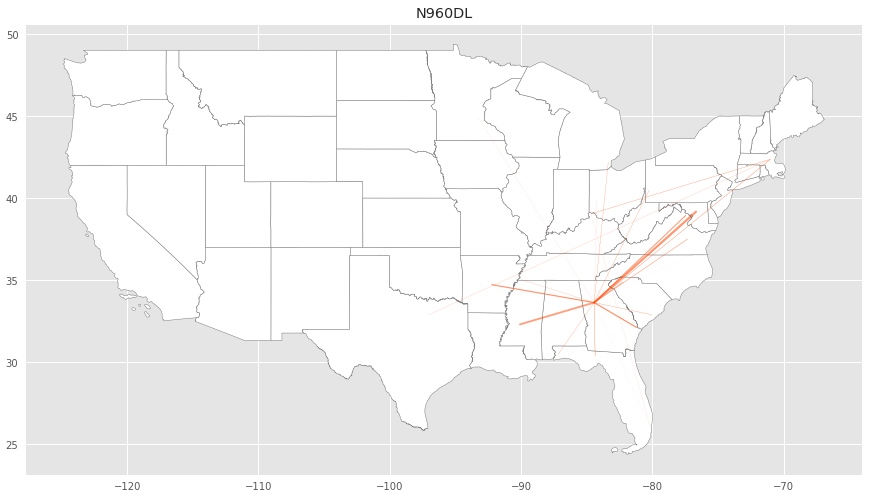

In [111]:
q4c2 = q4c[(q4c.TailNum=='N960DL')]

#zip disappear after creating a object
source_to_dest2 = zip(q4c2["OriginLat"], q4c2["DestLat"],
                     q4c2["OriginLong"], q4c2["DestLong"],
                     q4c2["TotalDelay"],(q4c2["TailNum"]))


with plt.style.context(("seaborn", "ggplot")):
    ## Plot world
    states.plot(figsize=(15,15), edgecolor="grey", color="white");

    ## Loop through each flight plotting line depicting flight between source and destination
    ## We are also plotting scatter points depicting source and destinations
    for slat,dlat,slon,dlon, TotalDelay,TailNum in source_to_dest2:
        plt.plot([slon , dlon], [slat, dlat], linewidth=TotalDelay/75, color='orangered', alpha=0.5)
        
    plt.title("N960DL")

In [112]:
#q4a(3)

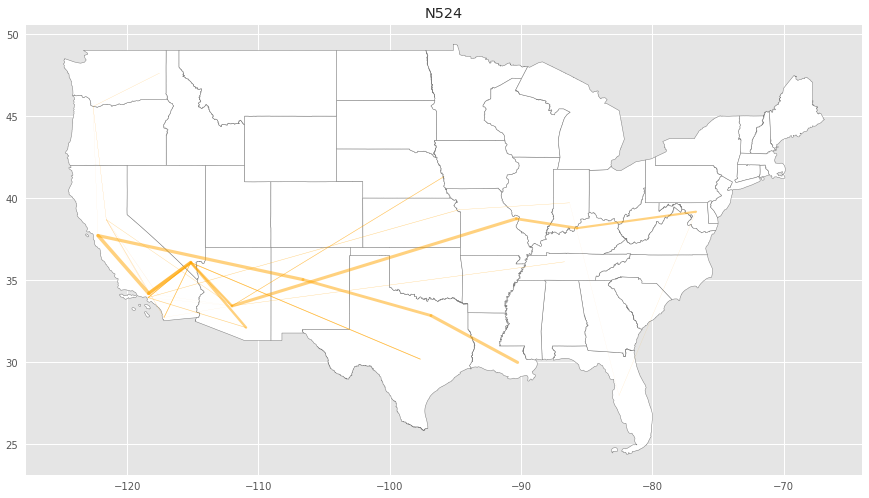

In [113]:
q4c3 = q4c[(q4c.TailNum=="N524")]

#zip disappear after creating a object
source_to_dest3 = zip(q4c3["OriginLat"], q4c3["DestLat"],
                     q4c3["OriginLong"], q4c3["DestLong"],
                     q4c3["TotalDelay"],(q4c3["TailNum"]))


with plt.style.context(("seaborn", "ggplot")):
    ## Plot world
    states.plot(figsize=(15,15), edgecolor="grey", color="white");

    ## Loop through each flight plotting line depicting flight between source and destination
    ## We are also plotting scatter points depicting source and destinations
    for slat,dlat,slon,dlon, TotalDelay,TailNum in source_to_dest3:
        plt.plot([slon , dlon], [slat, dlat], linewidth=TotalDelay/75, color='orange', alpha=0.5)
        
    plt.title("N524")

In [114]:
#q4a(4)

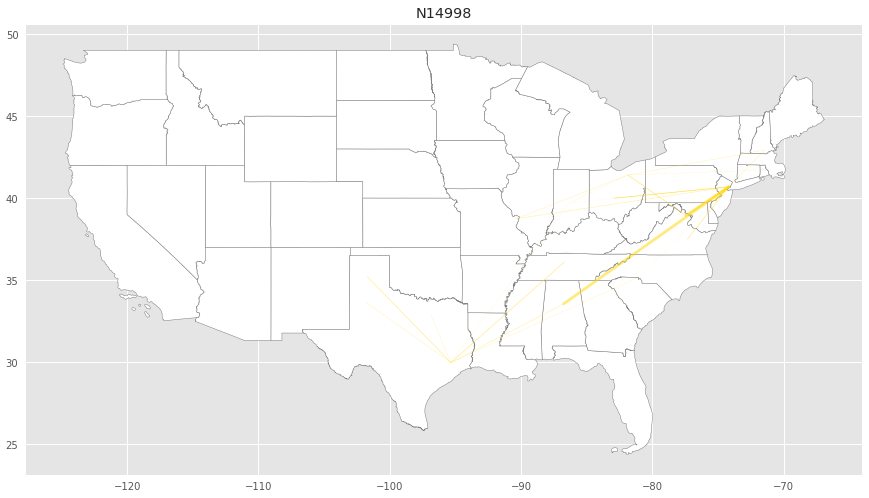

In [115]:
q4c4 = q4c[(q4c.TailNum=="N14998")]

#zip disappear after creating a object
source_to_dest4 = zip(q4c4["OriginLat"], q4c4["DestLat"],
                     q4c4["OriginLong"], q4c4["DestLong"],
                     q4c4["TotalDelay"],(q4c4["TailNum"]))


with plt.style.context(("seaborn", "ggplot")):
    ## Plot world
    states.plot(figsize=(15,15), edgecolor="grey", color="white");

    ## Loop through each flight plotting line depicting flight between source and destination
    ## We are also plotting scatter points depicting source and destinations
    for slat,dlat,slon,dlon, TotalDelay,TailNum in source_to_dest4:
        plt.plot([slon , dlon], [slat, dlat], linewidth=TotalDelay/75, color='gold', alpha=0.5)
        
    plt.title("N14998")   

In [116]:
#q4a(5)

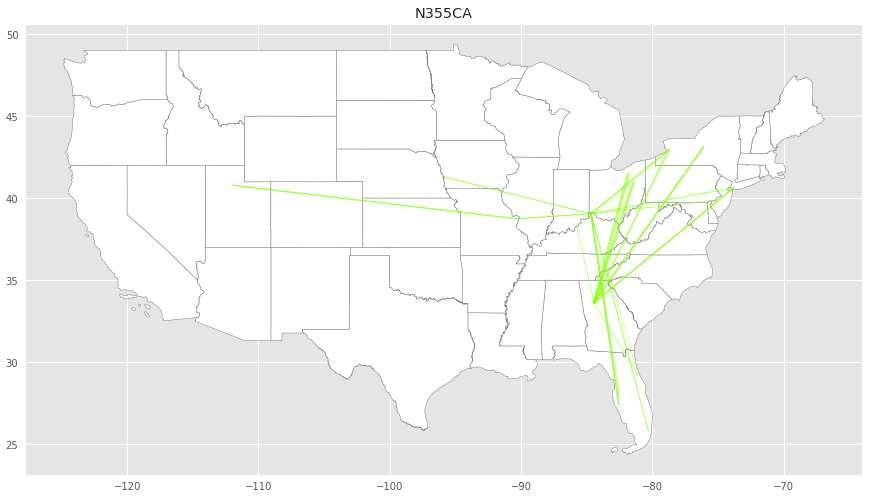

In [117]:
q4c5 = q4c[(q4c.TailNum=="N355CA")]

#zip disappear after creating a object
source_to_dest5 = zip(q4c5["OriginLat"], q4c5["DestLat"],
                     q4c5["OriginLong"], q4c5["DestLong"],
                     q4c5["TotalDelay"],(q4c5["TailNum"]))


with plt.style.context(("seaborn", "ggplot")):
    ## Plot world
    states.plot(figsize=(15,15), edgecolor="grey", color="white");

    ## Loop through each flight plotting line depicting flight between source and destination
    ## We are also plotting scatter points depicting source and destinations
    for slat,dlat,slon,dlon, TotalDelay,TailNum in source_to_dest5:
        plt.plot([slon , dlon], [slat, dlat], linewidth=TotalDelay/75, color='chartreuse', alpha=0.5)
        
    plt.title("N355CA") 

In [118]:
#q4a(6)

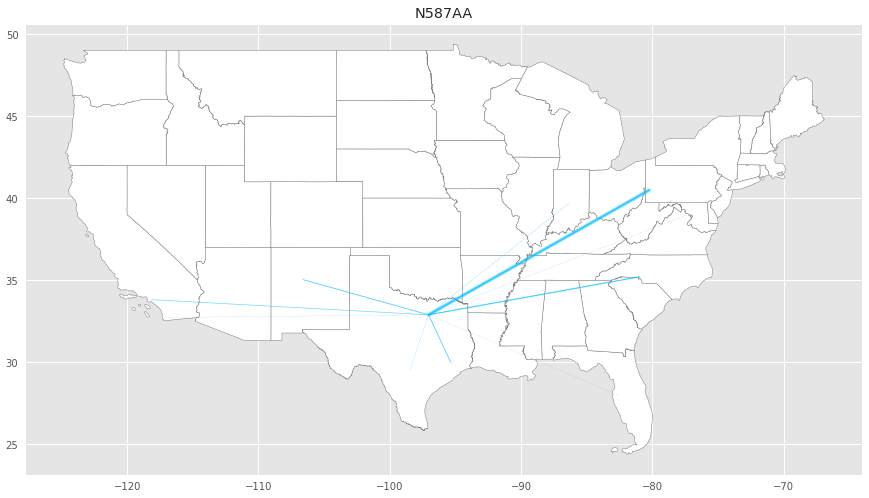

In [119]:
q4c6 = q4c[(q4c.TailNum=="N587AA")]

#zip disappear after creating a object
source_to_dest6 = zip(q4c6["OriginLat"], q4c6["DestLat"],
                     q4c6["OriginLong"], q4c6["DestLong"],
                     q4c6["TotalDelay"],(q4c6["TailNum"]))


with plt.style.context(("seaborn", "ggplot")):
    ## Plot world
    states.plot(figsize=(15,15), edgecolor="grey", color="white");

    ## Loop through each flight plotting line depicting flight between source and destination
    ## We are also plotting scatter points depicting source and destinations
    for slat,dlat,slon,dlon, TotalDelay,TailNum in source_to_dest6:
        plt.plot([slon , dlon], [slat, dlat], linewidth=TotalDelay/75, color='deepskyblue', alpha=0.5)
        
    plt.title("N587AA")   

In [120]:
#q4a(7)

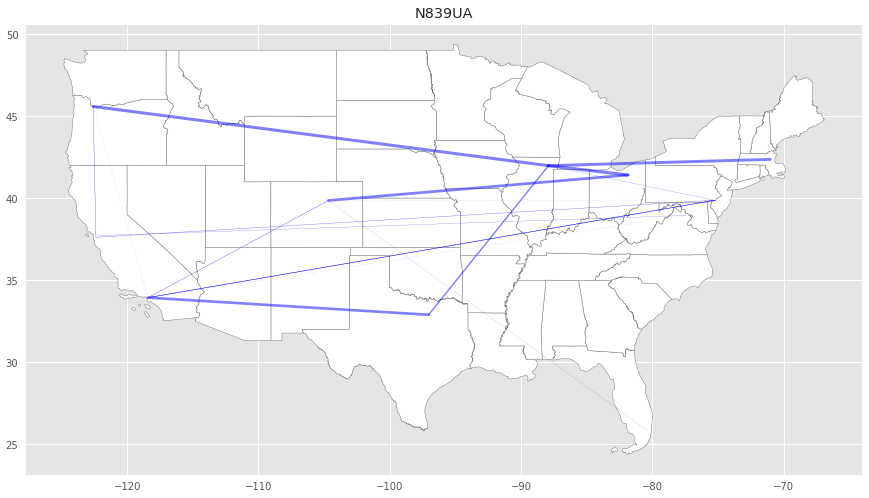

In [121]:
q4c7 = q4c[(q4c.TailNum=="N839UA")]

#zip disappear after creating a object
source_to_dest7 = zip(q4c7["OriginLat"], q4c7["DestLat"],
                     q4c7["OriginLong"], q4c7["DestLong"],
                     q4c7["TotalDelay"],(q4c7["TailNum"]))


with plt.style.context(("seaborn", "ggplot")):
    ## Plot world
    states.plot(figsize=(15,15), edgecolor="grey", color="white");

    ## Loop through each flight plotting line depicting flight between source and destination
    ## We are also plotting scatter points depicting source and destinations
    for slat,dlat,slon,dlon, TotalDelay,TailNum in source_to_dest7:
        plt.plot([slon , dlon], [slat, dlat], linewidth=TotalDelay/75, color='blue', alpha=0.5)
        
    plt.title("N839UA")  

In [122]:
#q4a(8)

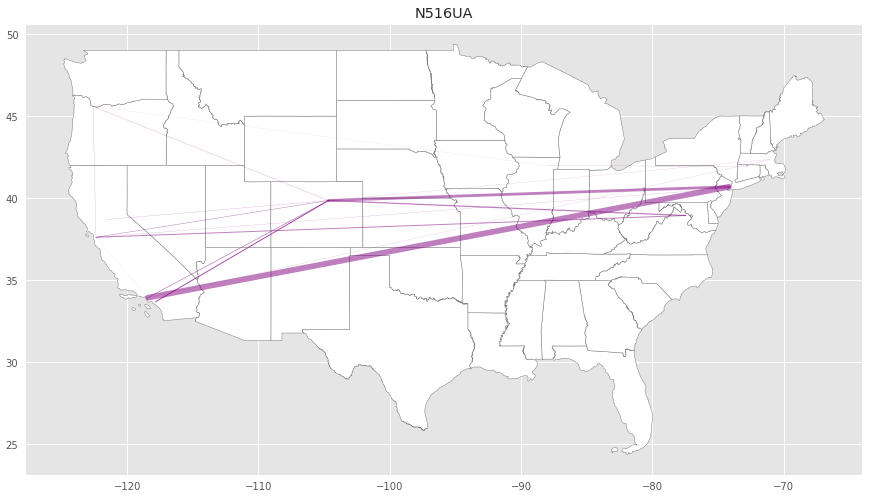

In [123]:
q4c8 = q4c[(q4c.TailNum=="N516UA")]

#zip disappear after creating a object
source_to_dest8 = zip(q4c8["OriginLat"], q4c8["DestLat"],
                     q4c8["OriginLong"], q4c8["DestLong"],
                     q4c8["TotalDelay"],(q4c8["TailNum"]))


with plt.style.context(("seaborn", "ggplot")):
    ## Plot world
    states.plot(figsize=(15,15), edgecolor="grey", color="white");

    ## Loop through each flight plotting line depicting flight between source and destination
    ## We are also plotting scatter points depicting source and destinations
    for slat,dlat,slon,dlon, TotalDelay,TailNum in source_to_dest8:
        plt.plot([slon , dlon], [slat, dlat], linewidth=TotalDelay/75, color='purple', alpha=0.5)
        
    plt.title("N516UA")    

In [124]:
#plotting of q4b

In [125]:
q4c["id"] = q4c.index + 1 

In [126]:
def do_annotate2(x_col, y_col, data, color, **kwargs):
    x = data[x_col]
    y = data[y_col]
    z = data["AirportOrigin"]
    for i in range(len(x)):
        plt.annotate(str(z.values[i]), xy=(x.values[i]-1, y.values[i]), fontsize=3,
                     xytext=(0, 10), textcoords="offset points",
                     color=kwargs.get("text_color", "k"),
                     va='center', ha='center', weight='bold')

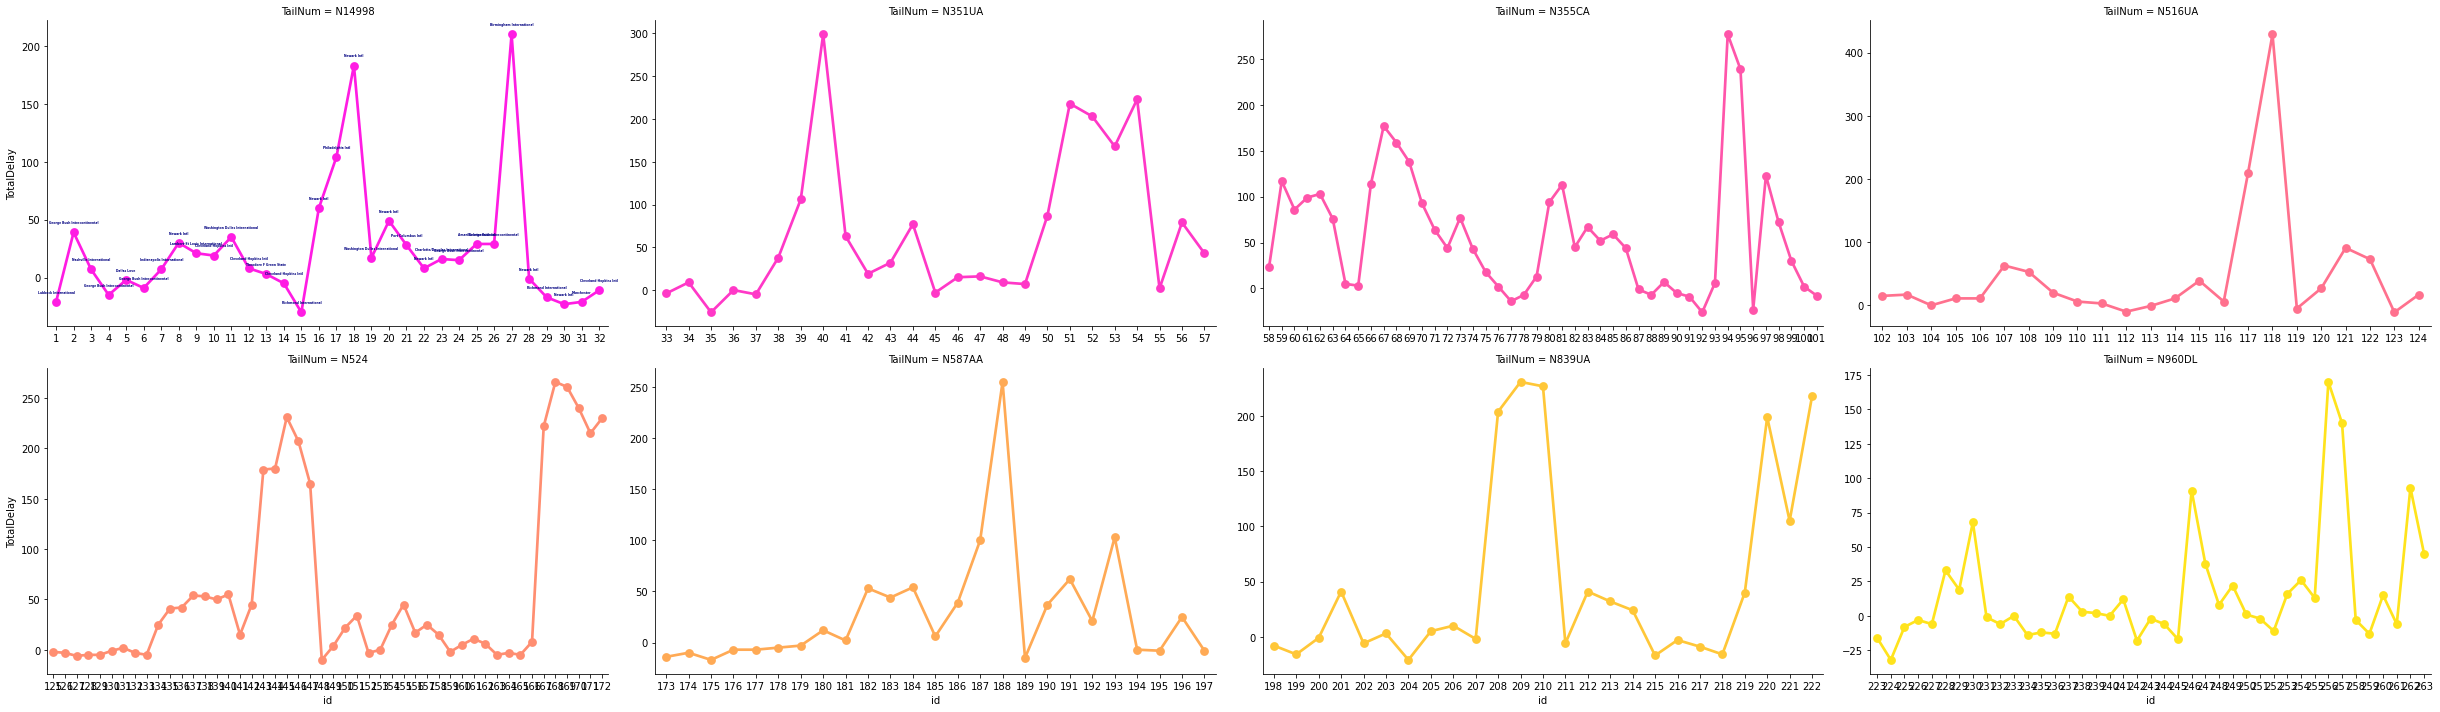

In [127]:
g4 = sns.catplot(kind='point', data=q4c, x="id", y="TotalDelay", hue="TailNum", palette='spring',
                col="TailNum", col_wrap=4, height=5, aspect=1.7, sharey=False, sharex=False, legend_out=True)
g4.map_dataframe(do_annotate2, 'id', 'TotalDelay', text_color='navy')

In [128]:
#=====Answer to Question 5=====

In [129]:
q5new = ontime.sample(n=5000,random_state=1) #creating random subset of n=5000 from ontime

In [130]:
q5new.to_csv('q5new.csv', index=None) #exporting to r as python sample can be replicated

In [131]:
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV      
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer #transform different types

In [140]:
features = ['Year', 'Month', 'DayofMonth', 'DepTime','TailNum']
X = q5new[features].copy()
y= q5new["Delay"]

In [141]:
numerical_features = ['Year', 'Month', 'DayofMonth','DepTime']

In [142]:
# Applying SimpleImputer and StandardScaler into a pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

In [143]:
categorical_features = ['TailNum']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [144]:
data_transformer = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_features),
        ('categorical', categorical_transformer, categorical_features)]) 


In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [146]:
param_grid = {
    'data_transformer__numerical__imputer__strategy': ['mean', 'median'],
    'data_transformer__categorical__imputer__strategy': ['constant','most_frequent']
}

In [147]:
#Logistic Regression

In [148]:
pipe_lr = Pipeline(steps=[('data_transformer', data_transformer),
                      ('pipe_lr', LogisticRegression(max_iter=10000, penalty = 'none'))])
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid)
grid_lr.fit(X_train, y_train);

In [149]:
#Penalised Logistic Regression

In [150]:
pipe_plr = Pipeline(steps=[('data_transformer', data_transformer),
                           ('pipe_plr', LogisticRegression(penalty='l1', max_iter=10000, tol=0.01, solver='saga'))])
grid_plr = GridSearchCV(pipe_plr, param_grid=param_grid)
grid_plr.fit(X_train, y_train);

In [151]:
#Gradient Boosting

In [152]:
pipe_gdb = Pipeline(steps=[('data_transformer', data_transformer),
       ('pipe_gdb',GradientBoostingClassifier(random_state=2))])

grid_gdb = GridSearchCV(pipe_gdb, param_grid=param_grid)
grid_gdb.fit(X_train, y_train);

In [153]:
#Classification Tree

In [154]:
pipe_tree = Pipeline(steps=[('data_transformer', data_transformer),
                           ('pipe_tree', DecisionTreeClassifier(random_state=0))])
grid_tree = GridSearchCV(pipe_tree, param_grid=param_grid)
grid_tree.fit(X_train, y_train);

In [155]:
#Random Forest

In [156]:
pipe_rf = Pipeline(steps=[('data_transformer', data_transformer),
                           ('pipe_rf', RandomForestClassifier(random_state=0))])
grid_rf = GridSearchCV(pipe_rf, param_grid=param_grid)
grid_rf.fit(X_train, y_train);

In [157]:
#Support Vector Machine

In [158]:
pipe_svm = Pipeline(steps=[('data_transformer', data_transformer),
                           ('pipe_svm',  LinearSVC(random_state=0, max_iter=10000, tol=0.01))])
grid_svm = GridSearchCV(pipe_svm, param_grid=param_grid)
grid_svm.fit(X_train, y_train);

In [159]:
#Compare ROC Curve

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be remov

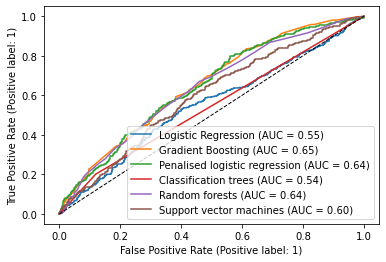

In [160]:
ax = plt.gca()
plot_roc_curve(grid_lr, X_test, y_test, ax=ax, name='Logistic Regression')
plot_roc_curve(grid_gdb, X_test, y_test, ax=ax, name='Gradient Boosting')
plot_roc_curve(grid_plr, X_test, y_test, ax=ax, name='Penalised logistic regression')
plot_roc_curve(grid_tree, X_test, y_test, ax=ax, name='Classification trees')
plot_roc_curve(grid_rf, X_test, y_test, ax=ax, name='Random forests')
plot_roc_curve(grid_svm, X_test, y_test, ax=ax, name='Support vector machines')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.show()

In [161]:
#===================